In [109]:
path = r"/home/kchen/Documents/AL/Data/Raw/Joined"

In [11]:
import os
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_auc_score
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot


In [33]:
#Open csv file
data = pd.read_csv(r'/home/kchen/Documents/AL/Data/data2.csv', index_col='CASEID')
data.head()

,PRNCPTX,OTHERCPT1,OTHERCPT2,OTHERCPT3,OTHERCPT4,OTHERCPT5,CONCPT1,COL_STEROID,COL_MECH_BOWEL_PREP,COL_ORAL_ANTIBIOTIC,...,HEIGHT,WEIGHT,BMI,PRSODM,PRBUN,PRCREAT,PRALBUM,PRWBC,PRHCT,PRPLATE
CASEID,,,,,,,,,,,,,,,,,,,,,
8080841,4,319,566,0,0,0,0,0,0,0,...,1.6764,70.760352,25.178780,141.0,13.0,0.59,3.0,6.70,26.9,333.0
8080850,4,616,250,270,133,0,0,0,0,0,...,1.7780,78.471416,24.822640,137.0,20.0,0.98,2.7,3.20,26.2,192.0
8080874,8,0,0,0,0,0,0,2,0,2,...,1.5494,89.357624,37.222412,140.0,7.0,0.51,3.6,10.82,35.9,360.0
8080921,0,616,0,0,0,0,0,0,0,0,...,1.8288,89.811216,26.853330,138.0,11.0,1.02,2.3,8.03,22.0,101.0
8080981,4,587,566,370,251,0,0,0,0,2,...,1.6764,68.945984,24.533170,143.0,12.0,0.80,4.1,10.20,42.0,238.0


In [4]:
num_cols = ['AGE', 'HEIGHT', 'WEIGHT', 'BMI', 'PRSODM', 'PRBUN', 'PRCREAT', 'PRALBUM', 'PRWBC', 'PRHCT', 'PRPLATE']

In [34]:
data.columns

Index(['PRNCPTX', 'OTHERCPT1', 'OTHERCPT2', 'OTHERCPT3', 'OTHERCPT4',
       'OTHERCPT5', 'CONCPT1', 'COL_STEROID', 'COL_MECH_BOWEL_PREP',
       'COL_ORAL_ANTIBIOTIC', 'COL_CHEMO', 'COL_INDICATION', 'COL_EMERGENT',
       'SEX', 'RACE_NEW', 'ETHNICITY_HISPANIC', 'DIABETES', 'SMOKE', 'DYSPNEA',
       'FNSTATUS2', 'VENTILAT', 'HXCOPD', 'ASCITES', 'HXCHF', 'HYPERMED',
       'RENAFAIL', 'DIALYSIS', 'STEROID', 'WTLOSS', 'BLEEDDIS', 'TRANSFUS',
       'PRSEPIS', 'ASACLAS', 'TRANST', 'WNDCLAS', 'CPT', 'OTHERCPT6',
       'OTHERCPT7', 'OTHERCPT8', 'OTHERCPT9', 'OTHERCPT10', 'CONCPT2',
       'CONCPT3', 'CONCPT4', 'CONCPT5', 'CONCPT6', 'CONCPT7', 'CONCPT8',
       'CONCPT9', 'CONCPT10', 'OPERYR', 'COL_APPROACH', 'COL_ICD9_INDICATION',
       'COL_ANASTOMOTIC', 'AGE', 'HEIGHT', 'WEIGHT', 'BMI', 'PRSODM', 'PRBUN',
       'PRCREAT', 'PRALBUM', 'PRWBC', 'PRHCT', 'PRPLATE'],
      dtype='object')

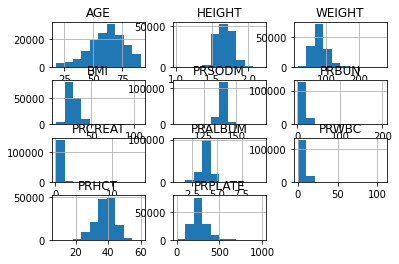

In [10]:
data[num_cols].hist()
pyplot.show()

In [35]:
rs = RobustScaler(with_centering=True)
mm = MinMaxScaler()

In [36]:
num_data = data[num_cols]
num_data.head()

,AGE,HEIGHT,WEIGHT,BMI,PRSODM,PRBUN,PRCREAT,PRALBUM,PRWBC,PRHCT,PRPLATE
CASEID,,,,,,,,,,,
8080841,69.0,1.6764,70.760352,25.178780,141.0,13.0,0.59,3.0,6.70,26.9,333.0
8080850,51.0,1.7780,78.471416,24.822640,137.0,20.0,0.98,2.7,3.20,26.2,192.0
8080874,30.0,1.5494,89.357624,37.222412,140.0,7.0,0.51,3.6,10.82,35.9,360.0
8080921,66.0,1.8288,89.811216,26.853330,138.0,11.0,1.02,2.3,8.03,22.0,101.0
8080981,70.0,1.6764,68.945984,24.533170,143.0,12.0,0.80,4.1,10.20,42.0,238.0


In [37]:
data[num_cols] = mm.fit_transform(data[num_cols])

In [40]:
data.columns

Index(['PRNCPTX', 'OTHERCPT1', 'OTHERCPT2', 'OTHERCPT3', 'OTHERCPT4',
       'OTHERCPT5', 'CONCPT1', 'COL_STEROID', 'COL_MECH_BOWEL_PREP',
       'COL_ORAL_ANTIBIOTIC', 'COL_CHEMO', 'COL_INDICATION', 'COL_EMERGENT',
       'SEX', 'RACE_NEW', 'ETHNICITY_HISPANIC', 'DIABETES', 'SMOKE', 'DYSPNEA',
       'FNSTATUS2', 'VENTILAT', 'HXCOPD', 'ASCITES', 'HXCHF', 'HYPERMED',
       'RENAFAIL', 'DIALYSIS', 'STEROID', 'WTLOSS', 'BLEEDDIS', 'TRANSFUS',
       'PRSEPIS', 'ASACLAS', 'TRANST', 'WNDCLAS', 'CPT', 'OTHERCPT6',
       'OTHERCPT7', 'OTHERCPT8', 'OTHERCPT9', 'OTHERCPT10', 'CONCPT2',
       'CONCPT3', 'CONCPT4', 'CONCPT5', 'CONCPT6', 'CONCPT7', 'CONCPT8',
       'CONCPT9', 'CONCPT10', 'OPERYR', 'COL_APPROACH', 'COL_ICD9_INDICATION',
       'COL_ANASTOMOTIC', 'AGE', 'HEIGHT', 'WEIGHT', 'BMI', 'PRSODM', 'PRBUN',
       'PRCREAT', 'PRALBUM', 'PRWBC', 'PRHCT', 'PRPLATE'],
      dtype='object')

In [41]:
data.to_csv(r'/home/kchen/Documents/AL/Data/data3.csv', index=True, index_label='CASEID')

In [5]:
scaler = StandardScaler()

In [6]:
data[num_cols] = scaler.fit_transform(data[num_cols])

In [7]:
data.head()

,PRNCPTX,OTHERCPT1,OTHERCPT2,OTHERCPT3,OTHERCPT4,OTHERCPT5,CONCPT1,COL_STEROID,COL_MECH_BOWEL_PREP,COL_ORAL_ANTIBIOTIC,...,WEIGHT,BMI,PRSODM,PRBUN,PRCREAT,PRALBUM,PRWBC,PRHCT,PRPLATE,COL_ANASTOMOTIC
CASEID,,,,,,,,,,,,,,,,,,,,,
8080841,4,319,566,0,0,0,0,0,0,0,...,-0.362064,-0.469441,0.622713,-0.252996,-0.582721,-1.589700,-0.337683,-1.995424,0.732020,0
8080850,4,616,250,270,133,0,0,0,0,0,...,-0.045279,-0.522338,-0.694906,0.531671,0.038896,-2.160550,-1.333135,-2.117770,-0.802652,0
8080874,8,0,0,0,0,0,0,2,0,2,...,0.401946,1.319396,0.293308,-0.925567,-0.710232,-0.448001,0.834106,-0.422392,1.025894,0
8080921,0,616,0,0,0,0,0,0,0,0,...,0.420581,-0.220720,-0.365502,-0.477186,0.102651,-2.921683,0.040589,-2.851852,-1.793114,0
8080981,4,587,566,370,251,0,0,0,0,2,...,-0.436601,-0.565333,1.281523,-0.365091,-0.248004,0.503415,0.657769,0.643774,-0.301979,0


In [8]:
data.shape

(146781, 64)

In [21]:
cat_cols = ['PRNCPTX', 'OTHERCPT1', 'OTHERCPT2', 'OTHERCPT3', 'OTHERCPT4', 'OTHERCPT5', 'CONCPT1', 'COL_STEROID', 'COL_MECH_BOWEL_PREP', 'COL_ORAL_ANTIBIOTIC', 'COL_CHEMO', 'COL_INDICATION', 'COL_EMERGENT', 'SEX', 'RACE_NEW', 'ETHNICITY_HISPANIC', 'DIABETES', 'SMOKE', 'DYSPNEA', 'FNSTATUS2', 'VENTILAT', 'HXCOPD', 'ASCITES', 'HXCHF', 'HYPERMED', 'RENAFAIL', 'DIALYSIS', 'STEROID', 'WTLOSS', 'BLEEDDIS', 'TRANSFUS', 'PRSEPIS', 'ASACLAS', 'TRANST','WNDCLAS', 'CPT', 'OTHERCPT6', 'OTHERCPT7', 'OTHERCPT8', 'OTHERCPT9', 'OTHERCPT10', 'CONCPT2', 'CONCPT3', 'CONCPT4', 'CONCPT5', 'CONCPT6', 'CONCPT7', 'CONCPT8', 'CONCPT9', 'CONCPT10', 'OPERYR']

In [22]:
data = data[cat_cols]

In [23]:
print(data.shape)

(156650, 51)


In [26]:
data.head()

,PRNCPTX,OTHERCPT1,OTHERCPT2,OTHERCPT3,OTHERCPT4,OTHERCPT5,CONCPT1,COL_STEROID,COL_MECH_BOWEL_PREP,COL_ORAL_ANTIBIOTIC,...,CONCPT2,CONCPT3,CONCPT4,CONCPT5,CONCPT6,CONCPT7,CONCPT8,CONCPT9,CONCPT10,OPERYR
CASEID,,,,,,,,,,,,,,,,,,,,,
8080841,4,353,625,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,6
8080850,4,719,280,323,159,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,6
8080874,8,0,0,0,0,0,0,2,0,2,...,1,1,0,0,0,0,0,0,0,6
8080921,0,719,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,6
8080981,4,689,625,444,308,0,0,0,0,2,...,1,1,0,0,0,0,0,0,0,6


In [24]:
data_scaled3 = pd.concat([data_scaled2, data], axis=1)

In [25]:
data_scaled3.head()

,AGE,HEIGHT,WEIGHT,BMI,PRSODM,PRBUN,PRCREAT,PRALBUM,PRWBC,PRHCT,...,CONCPT2,CONCPT3,CONCPT4,CONCPT5,CONCPT6,CONCPT7,CONCPT8,CONCPT9,CONCPT10,OPERYR
0,0.482686,0.121462,-0.359540,-0.463278,0.624518,-0.253070,-0.574500,-1.538589,-0.332457,-1.988310,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.722307,0.316238,-0.043068,-0.516153,-0.684040,0.520421,0.037470,-2.097772,-1.302300,-2.110640,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-2.128132,-0.122007,0.403715,1.324814,0.297378,-0.916062,-0.700032,-0.420222,0.809187,-0.415491,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.281853,0.413625,0.422331,-0.214661,-0.356901,-0.474068,0.100236,-2.843350,0.036084,-2.844622,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.549630,0.121462,-0.434004,-0.559130,1.278797,-0.363569,-0.244978,0.511750,0.637387,0.650531,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
data.to_csv(r'/home/kchen/Documents/AL/Data/data9.csv', index=True, index_label='CASEID')

In [14]:
# Assign categorical and numerical columns and cast cat as cat
cat_cols = ['PRNCPTX', 'OTHERCPT1', 'OTHERCPT2', 'OTHERCPT3', 'OTHERCPT4', 'OTHERCPT5', 'CONCPT1', 'COL_STEROID', 'COL_MECH_BOWEL_PREP', 'COL_ORAL_ANTIBIOTIC', 'COL_CHEMO', 'COL_INDICATION', 'COL_EMERGENT', 'SEX', 'RACE_NEW', 'ETHNICITY_HISPANIC', 'DIABETES', 'SMOKE', 'DYSPNEA', 'FNSTATUS2', 'VENTILAT', 'HXCOPD', 'ASCITES', 'HXCHF', 'HYPERMED', 'RENAFAIL', 'DIALYSIS', 'STEROID', 'WTLOSS', 'BLEEDDIS', 'TRANSFUS', 'PRSEPIS', 'ASACLAS', 'TRANST','WNDCLAS', 'CPT', 'OTHERCPT6', 'OTHERCPT7', 'OTHERCPT8', 'OTHERCPT9', 'OTHERCPT10', 'CONCPT2', 'CONCPT3', 'CONCPT4', 'CONCPT5', 'CONCPT6', 'CONCPT7', 'CONCPT8', 'CONCPT9', 'CONCPT10', 'OPERYR', 'COL_APPROACH', 'COL_ANASTOMOTIC']
num_cols = ['AGE', 'HEIGHT', 'WEIGHT', 'BMI', 'PRSODM', 'PRBUN', 'PRCREAT', 'PRALBUM', 'PRWBC', 'PRHCT', 'PRPLATE']
for c in cat_cols:
    data[c] = data[c].astype(CategoricalDtype())
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146781 entries, 8080841 to 7813386
Data columns (total 64 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   PRNCPTX              146781 non-null  category
 1   OTHERCPT1            146781 non-null  category
 2   OTHERCPT2            146781 non-null  category
 3   OTHERCPT3            146781 non-null  category
 4   OTHERCPT4            146781 non-null  category
 5   OTHERCPT5            146781 non-null  category
 6   CONCPT1              146781 non-null  category
 7   COL_STEROID          146781 non-null  category
 8   COL_MECH_BOWEL_PREP  146781 non-null  category
 9   COL_ORAL_ANTIBIOTIC  146781 non-null  category
 10  COL_CHEMO            146781 non-null  category
 11  COL_INDICATION       146781 non-null  category
 12  COL_EMERGENT         146781 non-null  category
 13  SEX                  146781 non-null  category
 14  RACE_NEW             146781 non-null  categor

In [44]:
data = pd.read_csv(r'/home/kchen/Documents/AL/Data/data6.csv', index_col='CASEID')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146781 entries, 8080841 to 7813386
Data columns (total 64 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   PRNCPTX              146781 non-null  int64  
 1   OTHERCPT1            146781 non-null  int64  
 2   OTHERCPT2            146781 non-null  int64  
 3   OTHERCPT3            146781 non-null  int64  
 4   OTHERCPT4            146781 non-null  int64  
 5   OTHERCPT5            146781 non-null  int64  
 6   CONCPT1              146781 non-null  int64  
 7   COL_STEROID          146781 non-null  int64  
 8   COL_MECH_BOWEL_PREP  146781 non-null  int64  
 9   COL_ORAL_ANTIBIOTIC  146781 non-null  int64  
 10  COL_CHEMO            146781 non-null  int64  
 11  COL_INDICATION       146781 non-null  int64  
 12  COL_EMERGENT         146781 non-null  int64  
 13  SEX                  146781 non-null  int64  
 14  RACE_NEW             146781 non-null  int64  
 15  ETHNICITY_

In [45]:
#Split into training and test data
y = data['COL_ANASTOMOTIC']
X = data.drop(['COL_ANASTOMOTIC'], axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [32]:
# Define model, predict, score
model1 = RandomForestClassifier(n_estimators=1000, min_samples_leaf=5, random_state=0)
model1.fit(X_train, y_train)
preds = model1.predict(X_valid)
score = roc_auc_score(y_valid, preds)
print('AUC:', score)

AUC: 0.5


In [33]:
model2 = XGBClassifier()
model2.fit(X_train, y_train)
preds2 = model2.predict(X_valid)
score2 = roc_auc_score(y_valid, preds2)
print('AUC:', score2)

/home/kchen/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[11:17:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUC: 0.5004551931827127


In [34]:
scores = cross_val_score(model1, X, y, cv=5, scoring='roc_auc', n_jobs=6)
print(scores)
print((scores.sum()) / 5)

[0.62925355 0.64644642 0.65870013 0.62748748 0.62978266]
0.6383340490847028


In [35]:
scores2 = cross_val_score(model2, X, y, cv=5, scoring='roc_auc', n_jobs=6)
print(scores2)
print((scores2.sum()) / 5)

/home/kchen/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/kchen/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/kchen/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning:

In [51]:
D_train = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
D_test = xgb.DMatrix(X_valid, label=y_valid, enable_categorical=True)

In [52]:
X_train.head()

,PRNCPTX,OTHERCPT1,OTHERCPT2,OTHERCPT3,OTHERCPT4,OTHERCPT5,CONCPT1,COL_STEROID,COL_MECH_BOWEL_PREP,COL_ORAL_ANTIBIOTIC,...,HEIGHT,WEIGHT,BMI,PRSODM,PRBUN,PRCREAT,PRALBUM,PRWBC,PRHCT,PRPLATE
CASEID,,,,,,,,,,,,,,,,,,,,,
8999718,3,359,624,0,0,0,0,0,2,2,...,1.7526,74.842680,24.365971,140.0,23.000,0.7700,4.1,8.55,45.8,374.0
3309884,6,0,0,0,0,0,0,0,0,2,...,1.6256,61.234920,23.172440,139.0,14.000,0.8597,3.9,7.20,39.0,252.0
8886693,6,359,407,0,0,0,0,0,2,2,...,1.6764,74.842680,26.631402,140.0,19.608,0.8400,3.9,11.00,39.0,218.0
4221844,4,0,0,0,0,0,0,0,0,0,...,1.7018,70.306760,24.276163,140.0,52.000,2.5600,2.4,6.90,36.0,456.0
3679718,6,359,0,0,0,0,0,0,0,0,...,1.8542,119.748288,34.830215,134.0,12.000,1.2000,4.4,8.80,48.7,287.0


In [54]:
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'binary:logistic',  
     } 

steps = 60
model3 = xgb.train(param, D_train, steps)
preds3 = model3.predict(D_test)
score3 = roc_auc_score(y_valid, preds3)
print(score3)

[11:40:20] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.6616213333181852


In [55]:
D_train2 = xgb.DMatrix(X, label=y, enable_categorical=False)

In [56]:
model4 = xgb.cv(param, D_train2, num_boost_round=100, nfold=5, metrics={'auc'}, seed=0, callbacks=[xgb.callback.EarlyStopping(3)])
print(model4)

    train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0         0.607065       0.002982       0.599754      0.008621
1         0.624211       0.003521       0.614025      0.005970
2         0.627817       0.001998       0.618210      0.007720
3         0.630933       0.001155       0.620451      0.008139
4         0.634090       0.002571       0.622546      0.006476
5         0.635098       0.002084       0.623116      0.006911
6         0.637236       0.002455       0.624912      0.006679
7         0.639701       0.001936       0.626301      0.008077
8         0.641924       0.001809       0.627014      0.008600
9         0.645117       0.002003       0.630104      0.009253
10        0.648419       0.002376       0.632412      0.008335
11        0.651990       0.002563       0.635291      0.007514
12        0.656479       0.002380       0.637487      0.006963
13        0.659870       0.001645       0.641522      0.008075
14        0.662607       0.001696       0.642357      0

In [31]:
def rf_feat_importance(model1, X):
    return pd.DataFrame({'cols':X.columns, 'imp':model1.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [32]:
fi = rf_feat_importance(model1, X)
fi[:10]

,cols,imp
61,PRPLATE,0.069825
27,BMI,0.068587
60,PRHCT,0.066685
59,PRWBC,0.065600
26,WEIGHT,0.064306
57,PRCREAT,0.061433
24,AGE,0.058748
56,PRBUN,0.051259
58,PRALBUM,0.043037
25,HEIGHT,0.042753


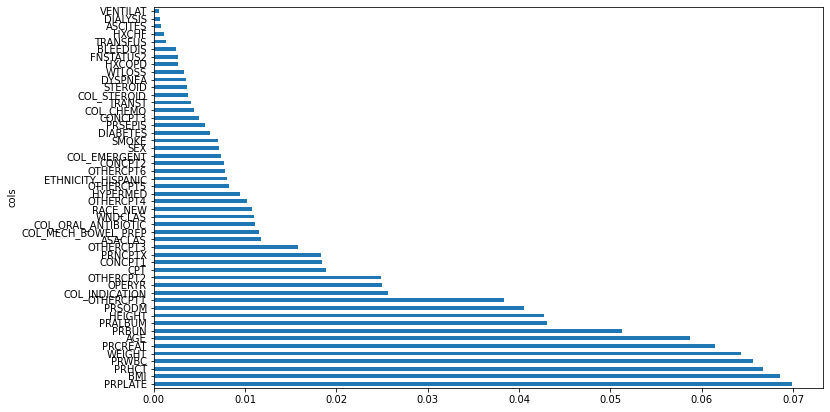

In [33]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:50]);